In [25]:
from keras import models, layers, optimizers
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

In [26]:
model = models.load_model(r"D:\CCW\Python\Keras practice\cats_dogs_classification\models\cats_and_dogs_small_1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [33]:
img_path = r'D:\CCW\Python\Keras practice\cats_dogs_classification\kaggle_dataset\dogs-vs-cats\test1\test1\40.jpg'
img = image.load_img(img_path, target_size =(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

(1, 150, 150, 3)


KerasTensor(type_spec=TensorSpec(shape=(None, 148, 148, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 74, 74, 32), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 72, 72, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 36, 36, 64), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 34, 34, 128), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 128), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")
KerasTensor(type_

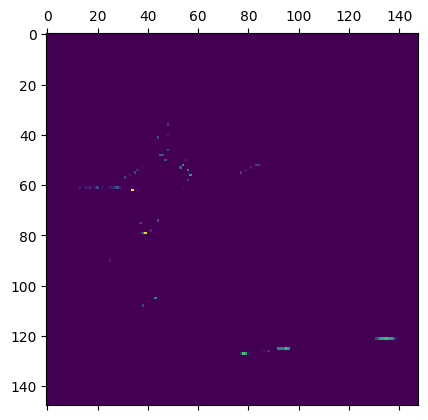

In [48]:
layer_optputs = [layer.output for layer in model.layers[:8]]
for op in layer_optputs:
    print(op)
activation_model = models.Model(inputs = model.input, outputs = layer_optputs)
activations = activation_model.predict(img_tensor)
# plt.matshow(activations[0][0, :, :, 0], cmap = 'viridis')
# plt.matshow(activations[0][0, :, :, 1], cmap = 'viridis')
# plt.matshow(activations[0][0, :, :, 2], cmap = 'viridis')
# plt.matshow(activations[0][0, :, :, 3], cmap = 'viridis')
plt.matshow(activations[0][0, :, :, 4], cmap = 'viridis')
# plt.matshow(activations[0][0, :, :, 5], cmap = 'viridis')
# plt.matshow(activations[0][0, :, :, 6], cmap = 'viridis')
plt.matshow(activations[0][0, :, :, 7], cmap = 'viridis')
print(activations[2].shape[3])


C:\Users\jjjay\AppData\Local\Temp\ipykernel_19196\1450832998.py:20: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0 ,255).astype('uint8')


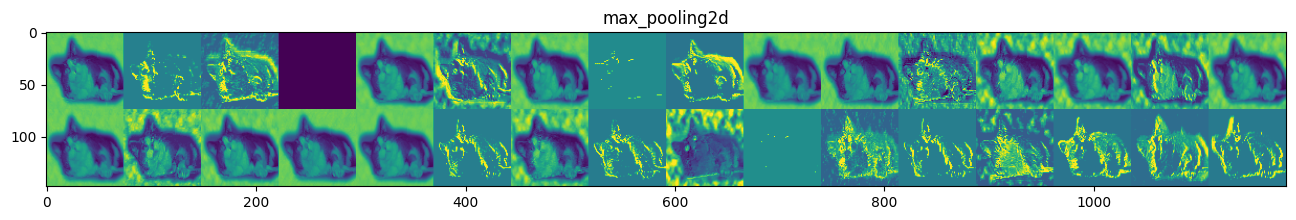

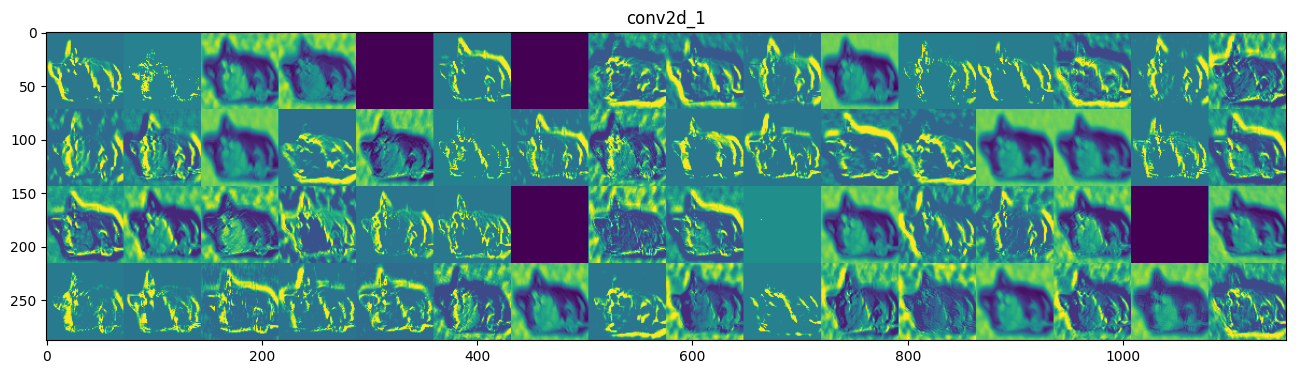

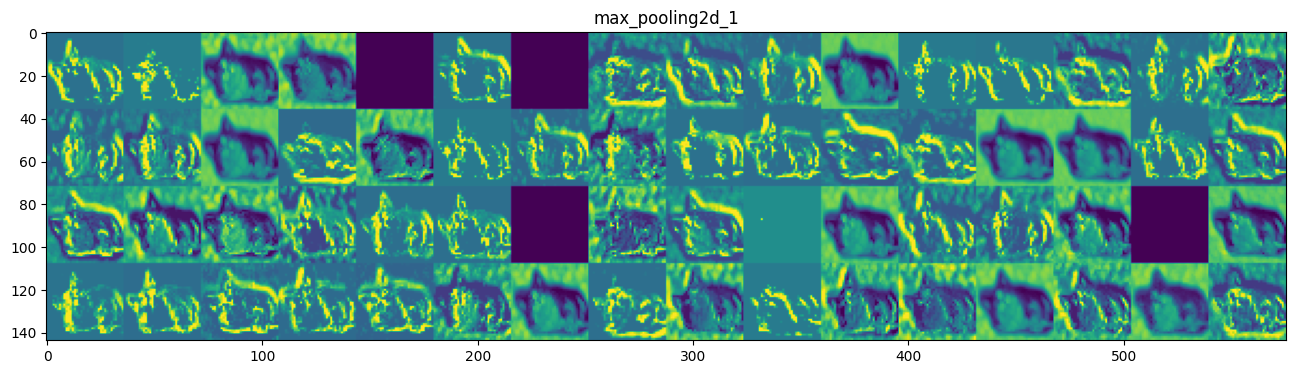

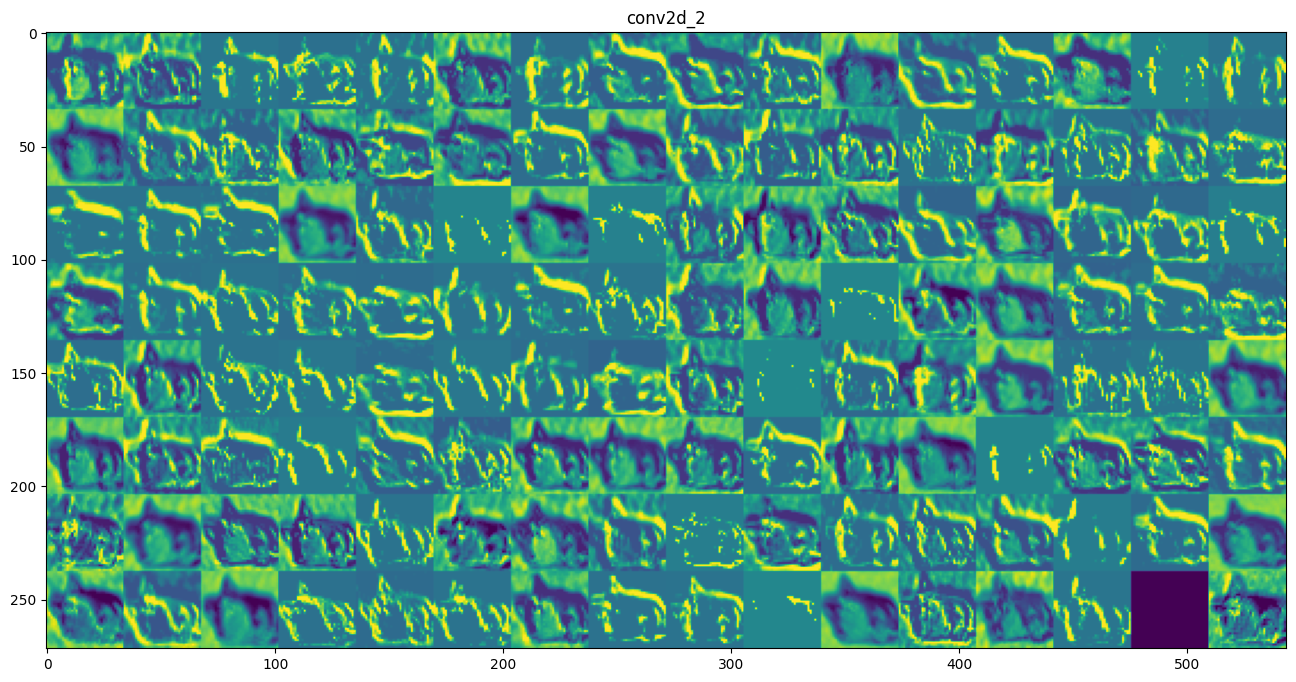

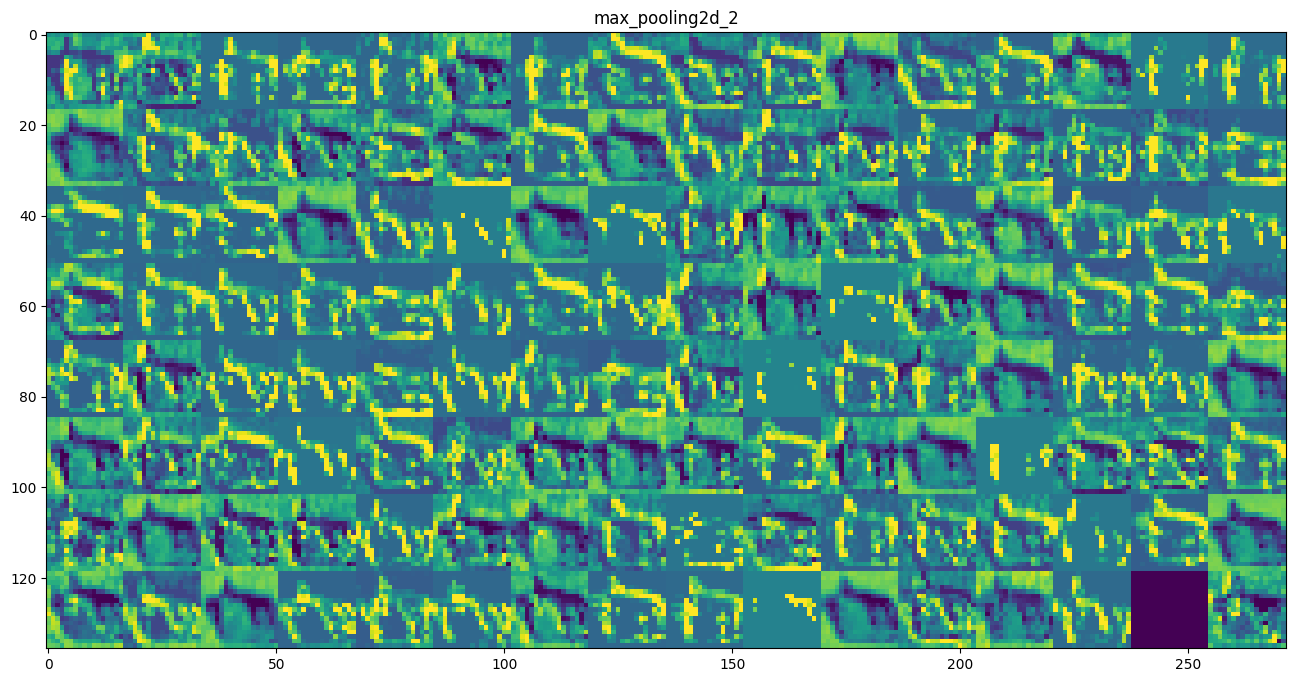

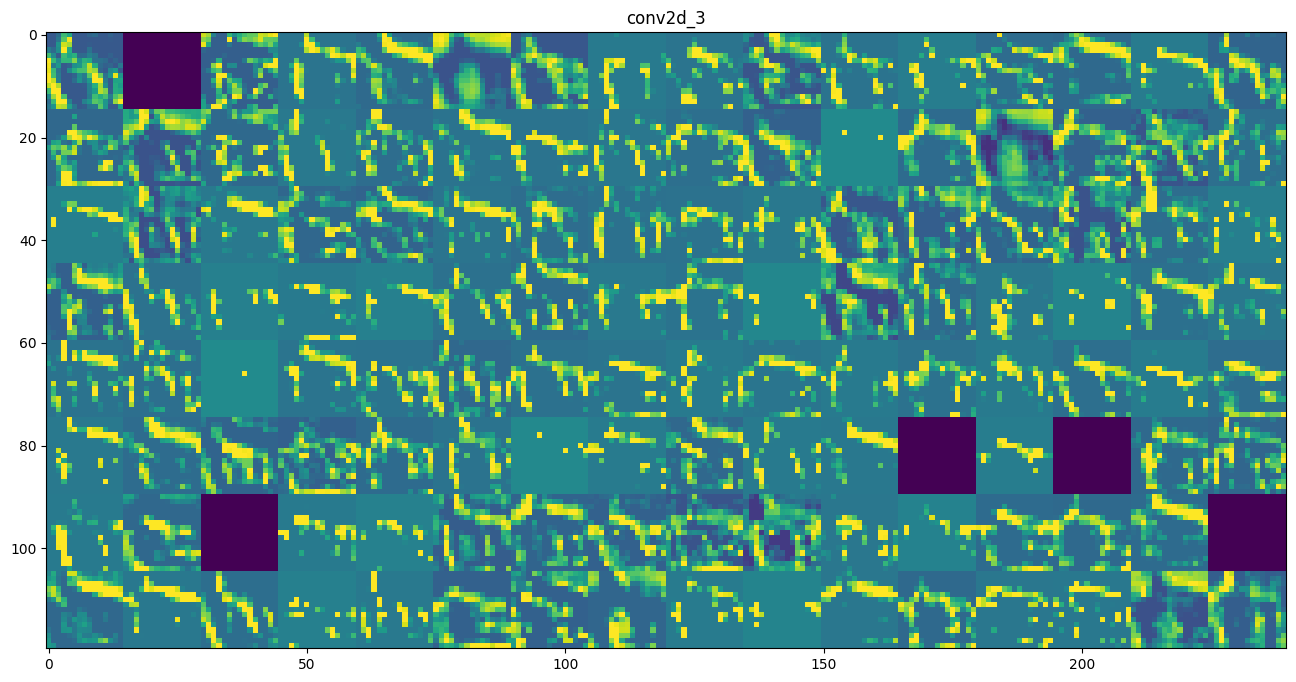

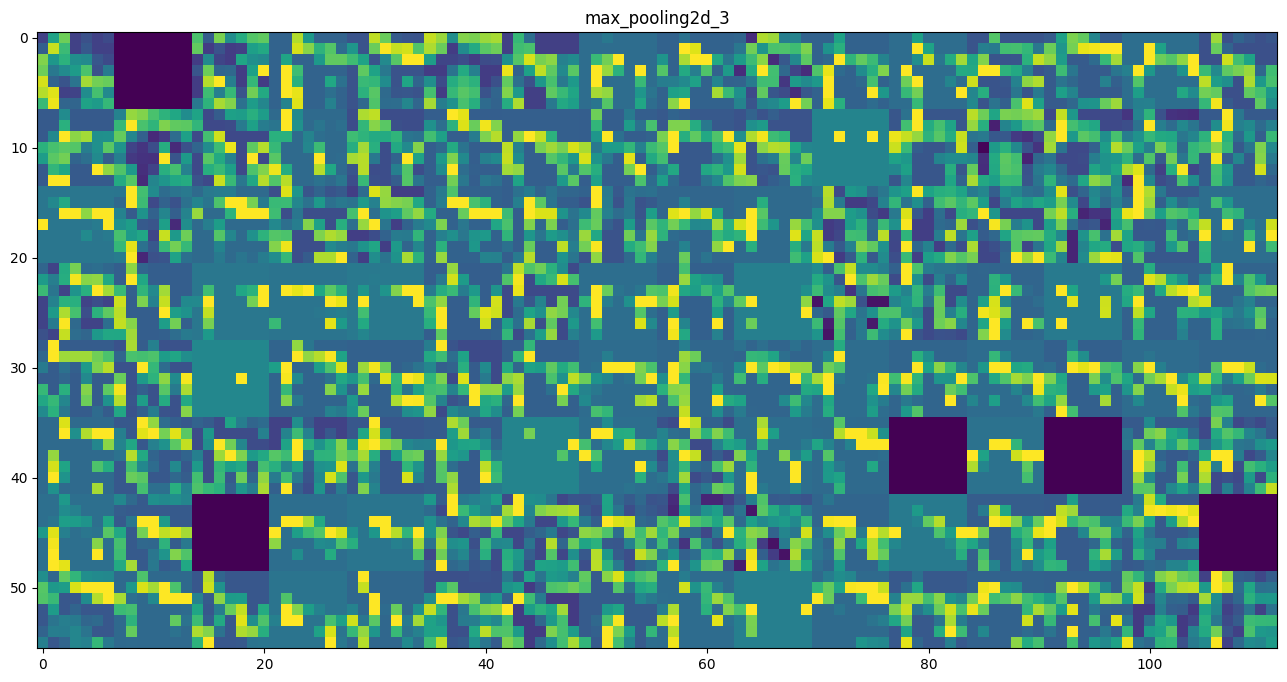

In [50]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_col = n_features // images_per_row
    display_grid = np.zeros((size * n_col, images_per_row * size))
    
    for col in range(n_col):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0 ,255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] =channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')